# Logistic Regression on PIMA dataset

In [10]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl
from src.viz import plot_roc_curve, plot_corr, plot_histograms
from src.util import check_imbalance

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=300

In [11]:
# reading the file
df = pd.read_csv("../data/pima-indians-diabetes.csv")

In [12]:
# checking the top 5, bottom 5 and random 5 samples
display(df.head(),df.tail(),df.sample(5))

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
682,0,95,64,39,105,44.6,0.366,22,0
692,2,121,70,32,95,39.1,0.886,23,0
650,1,91,54,25,100,25.2,0.234,23,0
121,6,111,64,39,0,34.2,0.260,24,0
469,6,154,78,41,140,46.1,0.571,27,0


In [13]:
# checking the shape of the dataset
df.shape

(768, 9)

In [14]:
# checking the null values in the columns
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

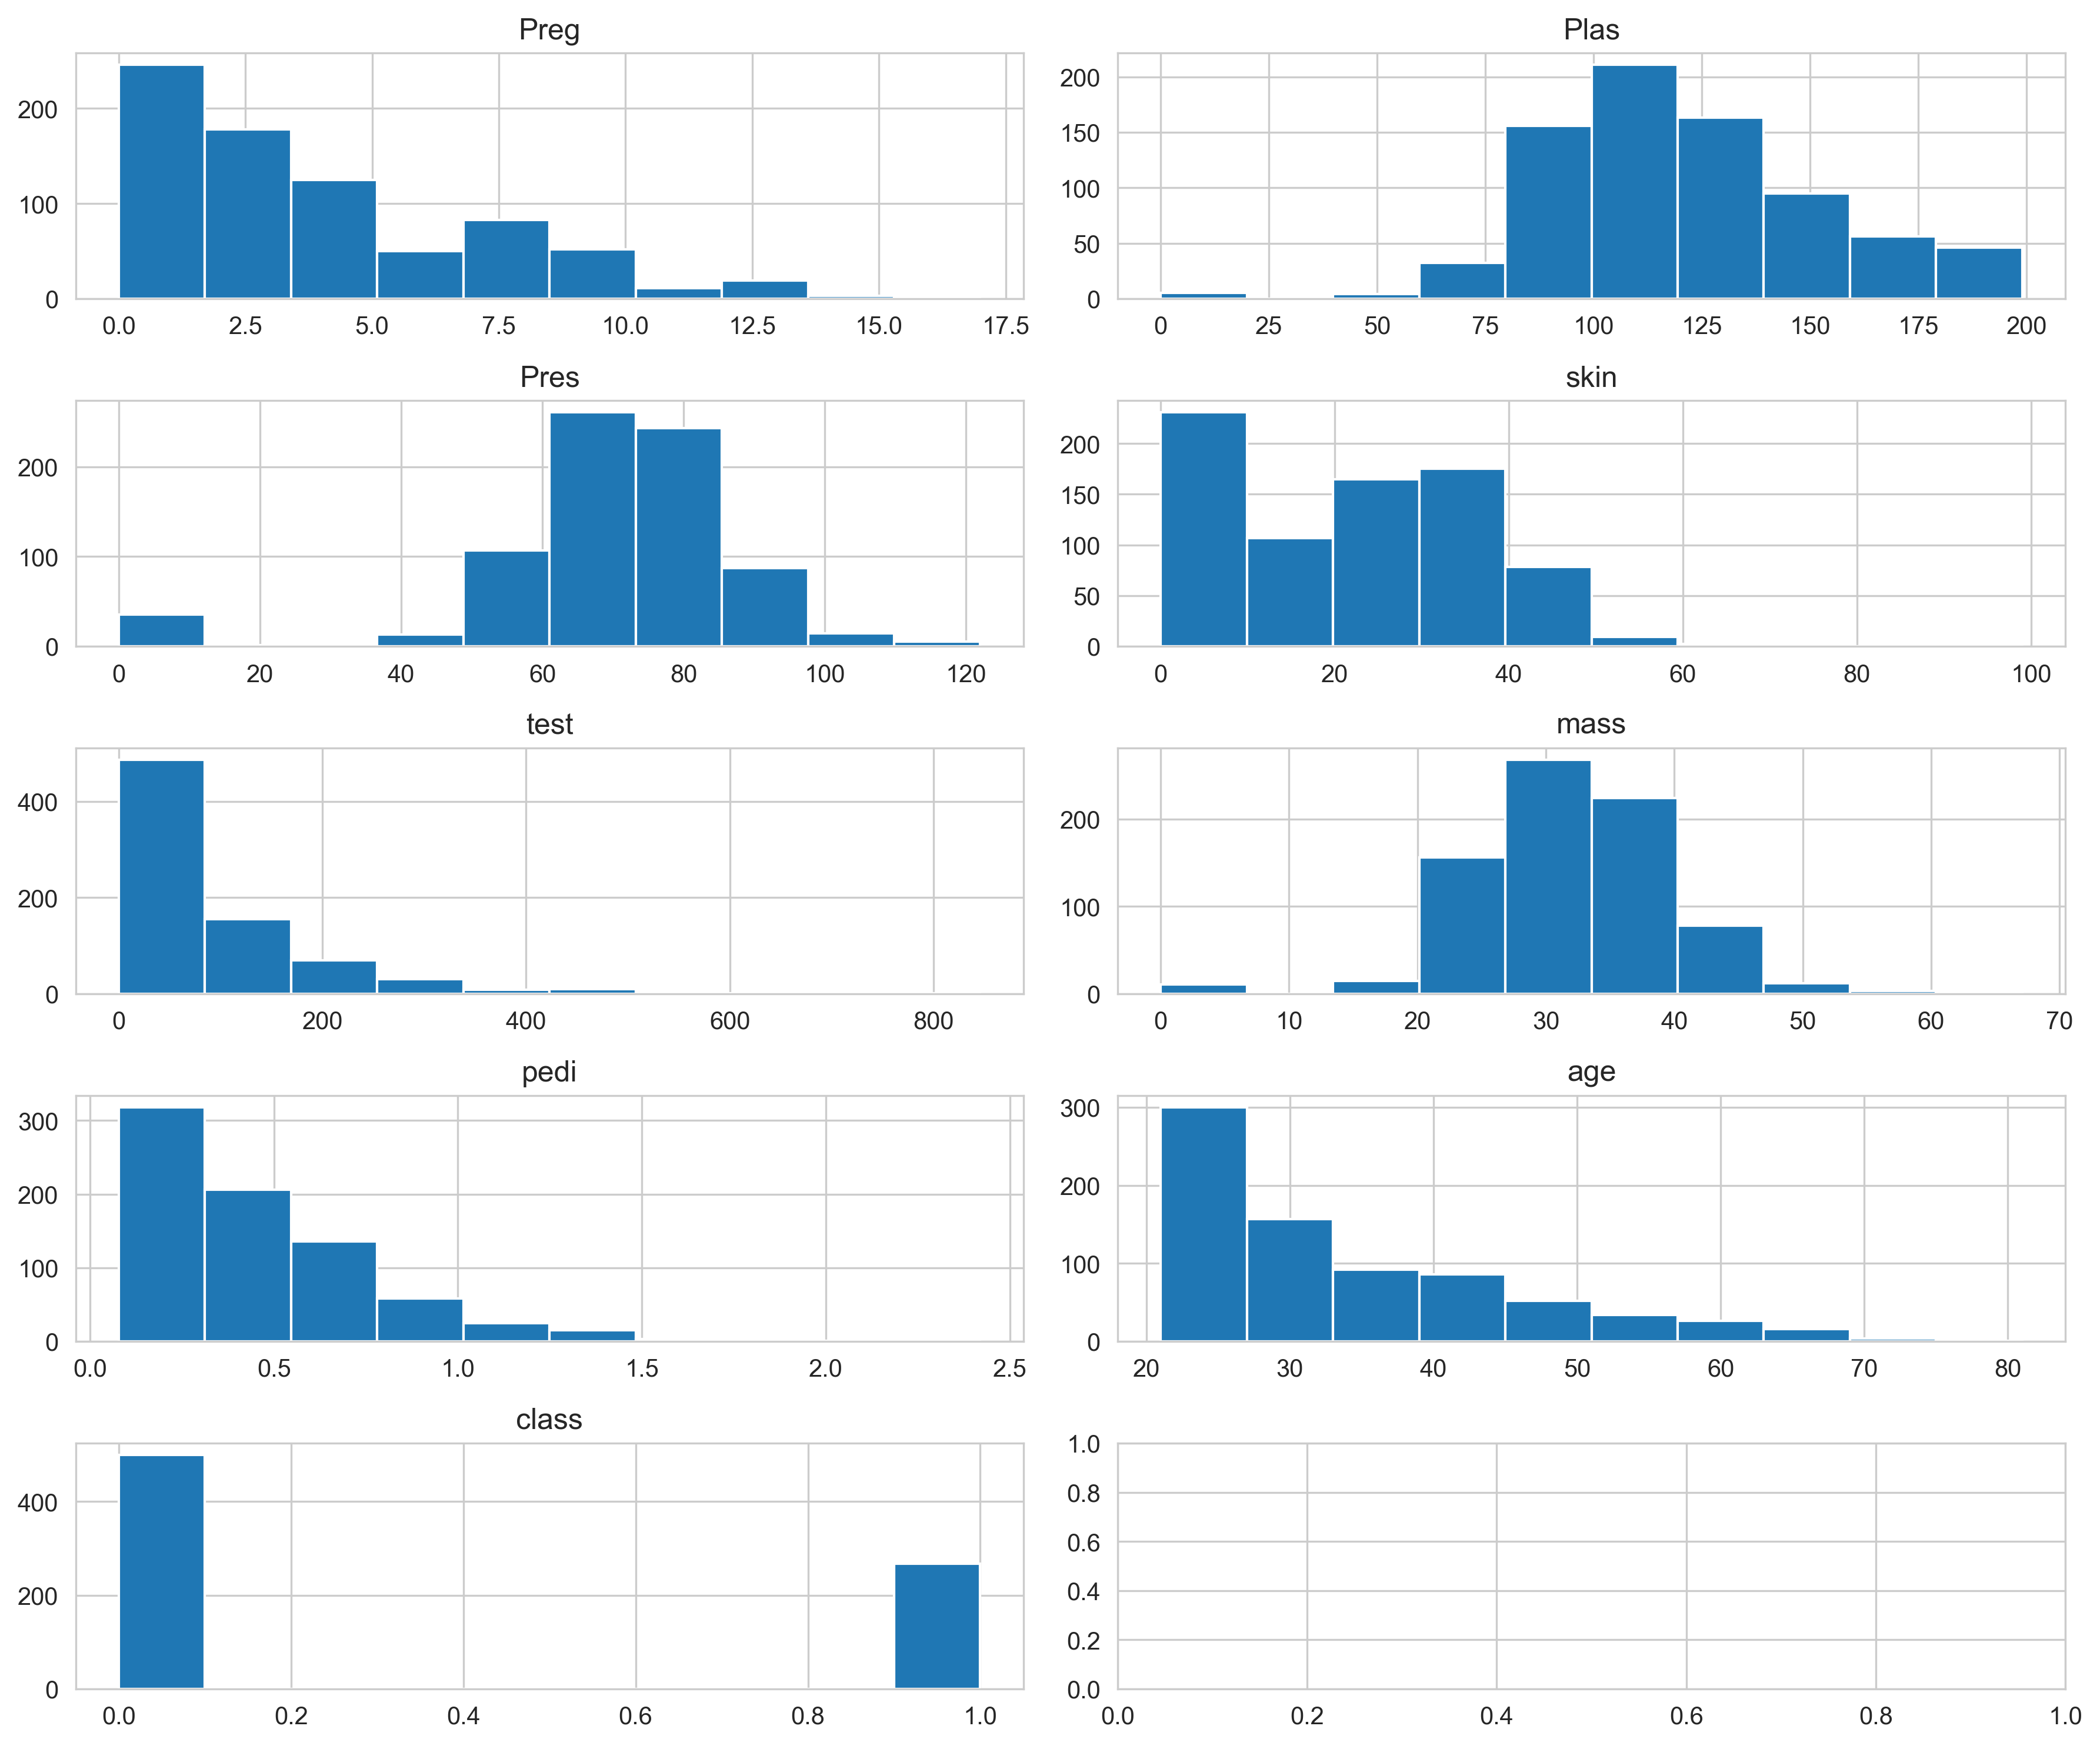

In [18]:
plot_histograms(df)

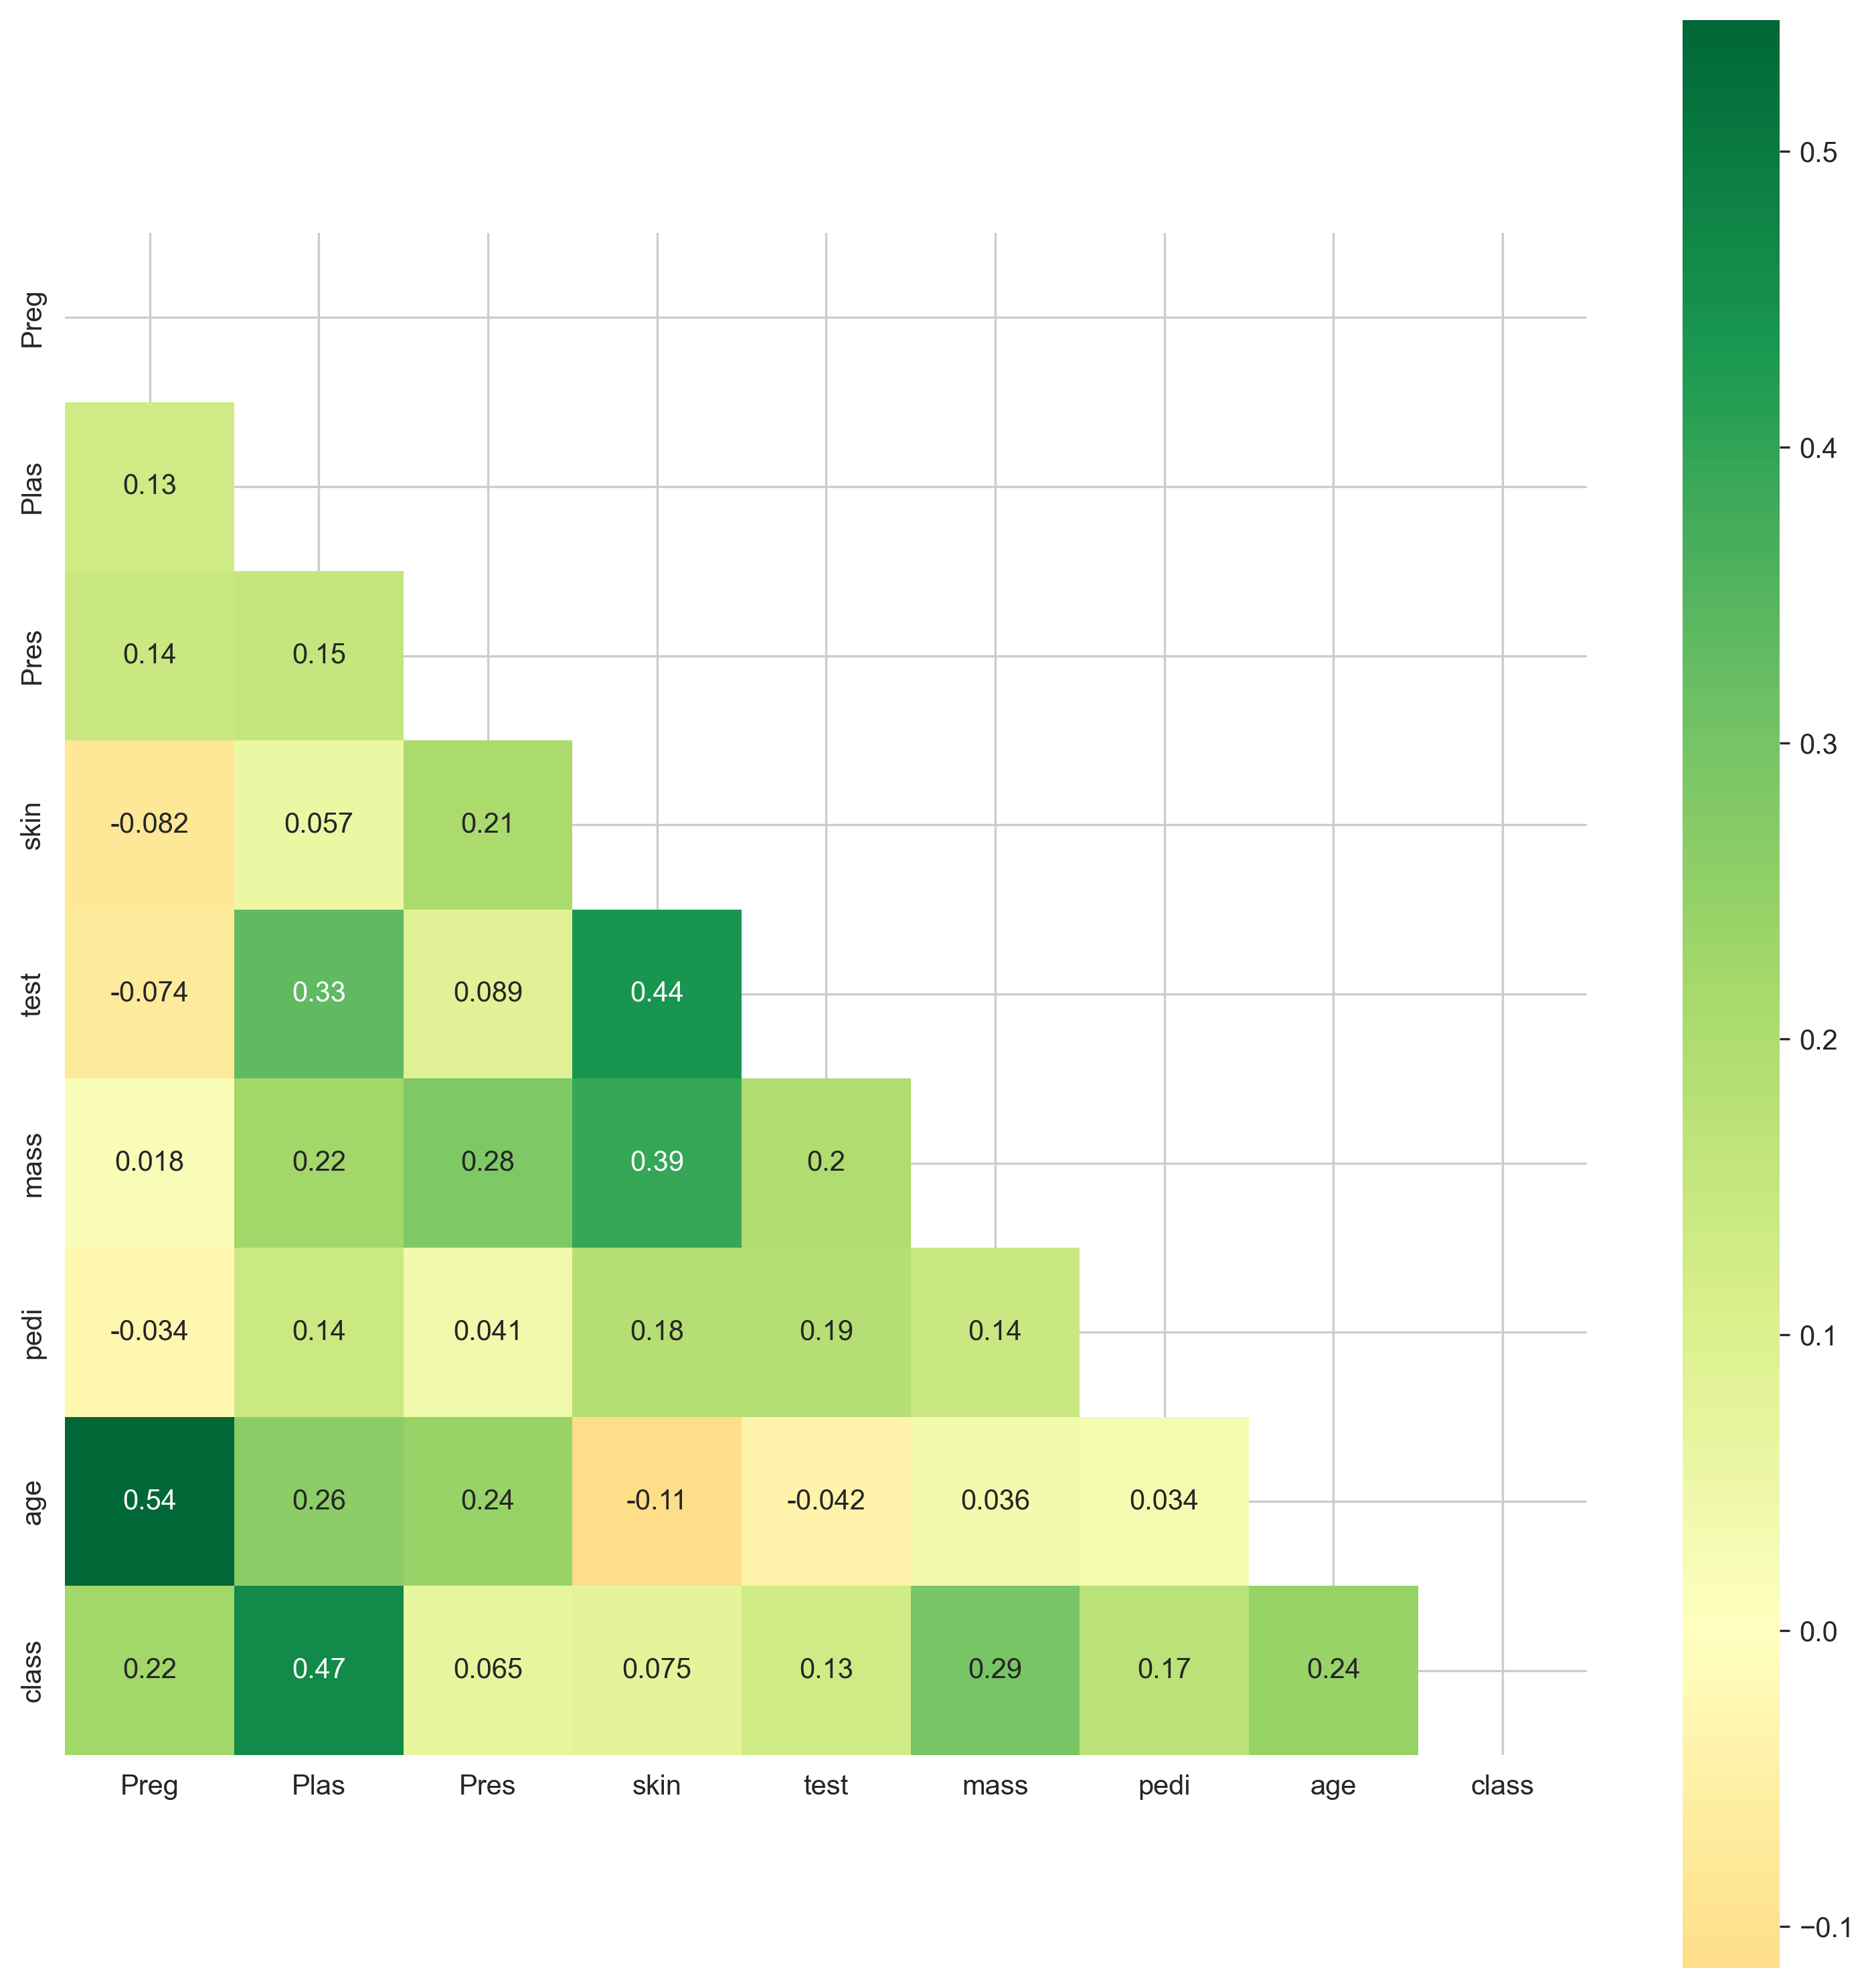

In [19]:
# creating correlation matrix
corr= df.corr()
# plotting correlation
plot_corr(corr)

Calculating diabetes ratio of True/False from outcome variable 

In [22]:
check_imbalance(df,class_column='class')

Number of true: 268 (34.9%)
Number of false: 500 (65.104%)


35% of people with diabetes \
65% of people without diabetes

Data Preparation

In [21]:
# splitting into independent and dependent variable
X = df.drop('class', axis=1)
y = df['class']

# imputing 0 with mean
imputer = SimpleImputer(missing_values=0, strategy='mean')
col = X.columns
X[col] = imputer.fit_transform(X[col])
X.columns = col

# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [22]:
# creating logistic regression object with 1000 iterations
logreg = LogisticRegression(max_iter=1000)
# fitting with training data
logreg.fit(x_train, y_train)
# predicting on testing data
y_pred = logreg.predict(x_test)

In [23]:
# calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
# calculating the precision
precision = metrics.precision_score(y_test, y_pred)
# calculating the recall
recall = metrics.recall_score(y_test, y_pred)
# calculating the f1 score
f1 = metrics.f1_score(y_test, y_pred)

# printing out the results
print(f"The  model has an accuracy of {accuracy*100:.2f}%")
print(f"Precision is {precision*100 : .2f} %")
print(f"Recall is {recall*100 : .2f}%")
print(f"F1 Score is {f1 * 100 : .2f}")

The  model has an accuracy of 77.92%
Precision is  73.53 %
Recall is  60.24%
F1 Score is  66.23


Perfomance Measures

In [24]:
x_train['pred_prob'] = logreg.predict(x_train)
x_test['pred_prob'] = logreg.predict(x_test)

# computing ROC curve and area under curve for the model
fpr1, tpr1, threshold1  = roc_curve(y_train, x_train['pred_prob'])
# calculating the AUC area under curve
roc_auc1 = auc(fpr1, tpr1)
# calculating gini coefficient
gini2 = (2*roc_auc1)-1
# printing the outputs
display(f"Area  Under Curve for train: {roc_auc1}")
display(f"Gini Index for train: {gini2}")
# computing ROC curve and area under curve for the model
fpr2, tpr2, threshold2  = roc_curve(y_test, x_test['pred_prob'])
# calculating the AUC area under curve
roc_auc2 = auc(fpr2, tpr2)
# calculating gini coefficient
gini2 = (2*roc_auc2)-1
# printing the outputs
display(f"Area  Under Curve for test: {roc_auc2}")
display(f"Gini Index for test: {gini2}")

'Area  Under Curve for train: 0.7242628992628992'

'Gini Index for train: 0.44852579852579844'

'Area  Under Curve for test: 0.7403940084662977'

'Gini Index for test: 0.4807880169325953'

Creating ROC Curve

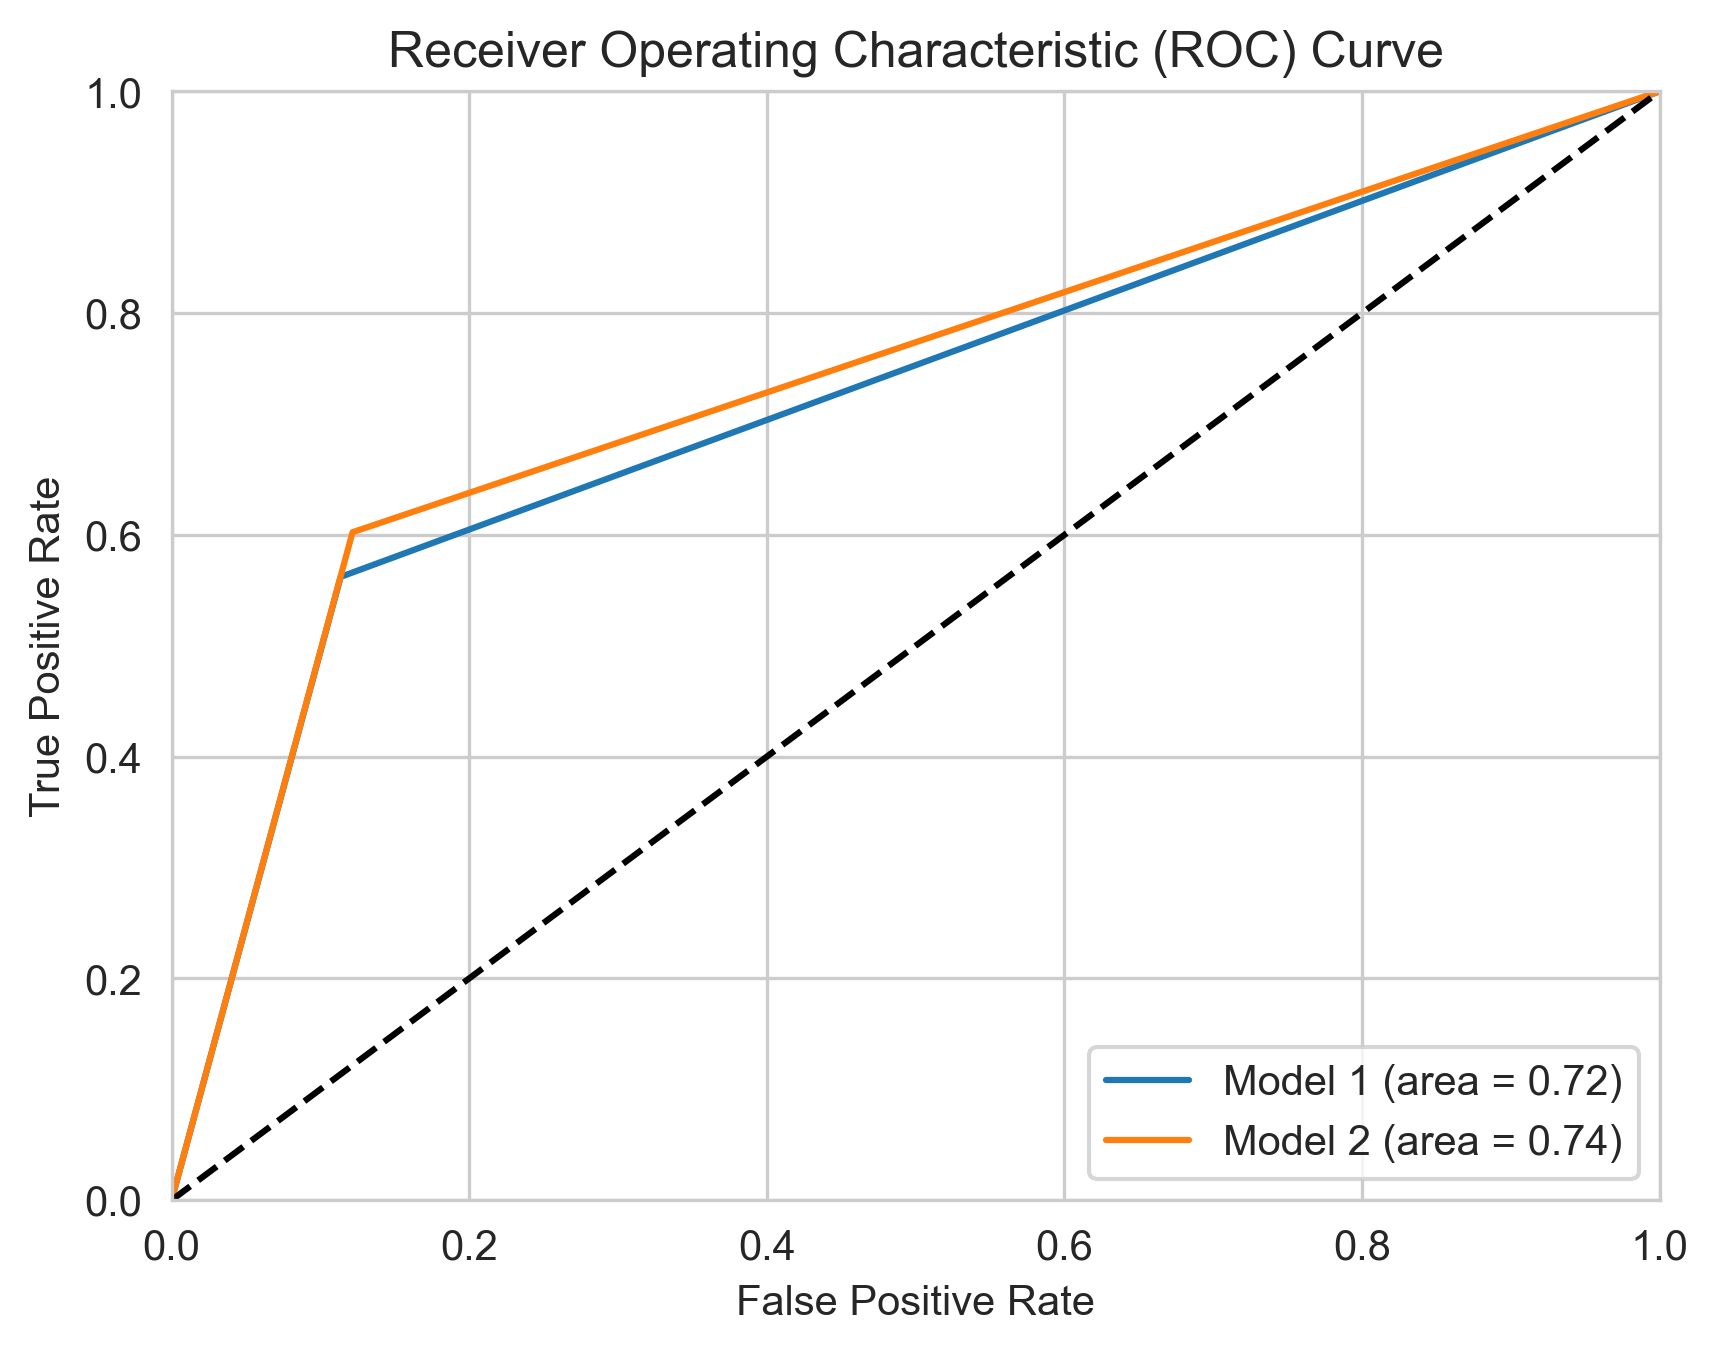

In [25]:
fpr_list = [fpr1, fpr2]
tpr_list = [tpr1, tpr2]
roc_auc_list = [roc_auc1, roc_auc2]
labels = ['Model 1', 'Model 2']

plot_roc_curve(fpr_list, tpr_list, roc_auc_list, labels)

<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>